In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as igt
from acoustics import EDC, T, EDT, C, D50

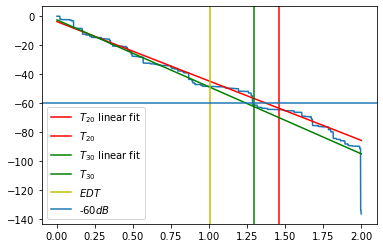

In [2]:
fs = 1000
x = np.linspace(0, 2, fs * 2)
rir = np.exp(-5 * x + (np.random.uniform(-3, 3, 2000) * np.random.uniform(-2, 2, 2000)))
edc = EDC(rir)
plt.plot(x, edc)
plt.plot(x, T(20, edc, poly=True)[1](x * fs), color= 'r', label='$T_{20}$ linear fit')
plt.axvline(x=T(20, edc) / fs, color='r', label='$T_{20}$')
plt.plot(x, T(30, edc, poly=True)[1](x * fs), color= 'g', label='$T_{30}$ linear fit')
plt.axvline(x=T(30, edc) / fs, color='g', label='$T_{30}$')
plt.axvline(x=EDT(edc) / fs, color='y', label='$EDT$')
plt.axhline(y=-60, label='-$60dB$')
plt.legend()

In [3]:
assert np.isclose(
    C(50, rir, 1000), 
    10 * np.log10(D50(rir, 1000) / (1.0 - D50(rir, 1000)))
) # (A.12)

In [4]:
import mitsuba
mitsuba.set_variant('gpu_autodiff_acoustic')
import enoki as ek
from mitsuba.core import Float, Mask, UInt32

2021-06-28 10:58:42 INFO main [optix_api.cpp:56] Dynamic loading of the Optix library ..

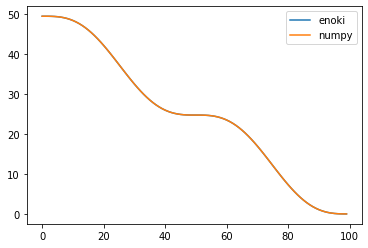

In [5]:
x = np.sin(np.linspace(0, 2 * np.pi, 100))
x_ek = Float(x)
ek.set_requires_gradient(x_ek)

y_ek = ek.reverse(ek.psum(ek.reverse(ek.pow(x_ek, 2))))
y_np = np.cumsum(x[::-1]**2)[::-1]

plt.plot(y_ek, label='enoki')
plt.plot(y_np, label='numpy')
plt.legend()

In [6]:
loss = y_ek - x_ek
ek.backward(loss)

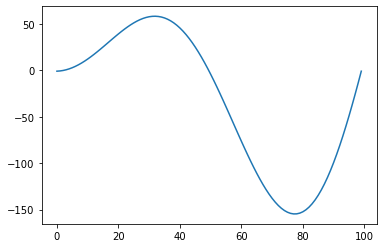

In [7]:
plt.plot(ek.gradient(x_ek))

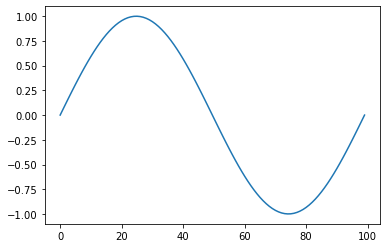

In [8]:
plt.plot(x_ek)

In [16]:
#ek.binary_search(0, len(x_ek), lambda i: help(i))#ek.gather(x_ek, i) > Float(0.))

In [17]:
help(ek.binary_search)

Help on built-in function binary_search in module enoki:

binary_search(...) method of builtins.PyCapsule instance
    binary_search(*args, **kwargs)
    Overloaded function.
    
    1. binary_search(start: int, end: int, pred: Callable[[int], bool]) -> int
    
    2. binary_search(start: int, end: int, pred: Callable[[enoki.cuda.UInt32], enoki.cuda.Mask]) -> enoki.cuda.UInt32
    
    3. binary_search(start: int, end: int, pred: Callable[[enoki.cuda_autodiff.UInt32], enoki.cuda_autodiff.Mask]) -> enoki.cuda_autodiff.UInt32



In [11]:
idx = UInt32.arange(len(x_ek))

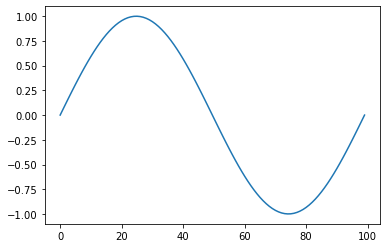

In [12]:
plt.plot(ek.gather(x_ek, idx))

In [13]:
a = Float.linspace(0, 1, 10)

In [14]:
idx = UInt32(np.arange(10))
c = ek.gather(a, idx)

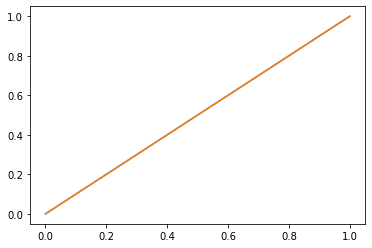

In [15]:
plt.plot(a, c)
plt.plot(a, a)